# 22 - A/B Testing Framework

**Key Idea:** A/B testing is like a taste test - we compare two versions to see which one performs better.

## The A/B Testing Process

1. **Decide on a metric** (what are we measuring?)
2. **Split randomly** (half get version A, half get version B)
3. **Show versions** (run the experiment)
4. **Wait and collect data**
5. **Compare results** (is the difference real or just luck?)

**Real-World Use:** Amazon tests two checkout pages to see which converts better!

## Simple Example: Cookie Recipe Taste Test

Half the class tries Recipe A, half tries Recipe B. Which one do they prefer?

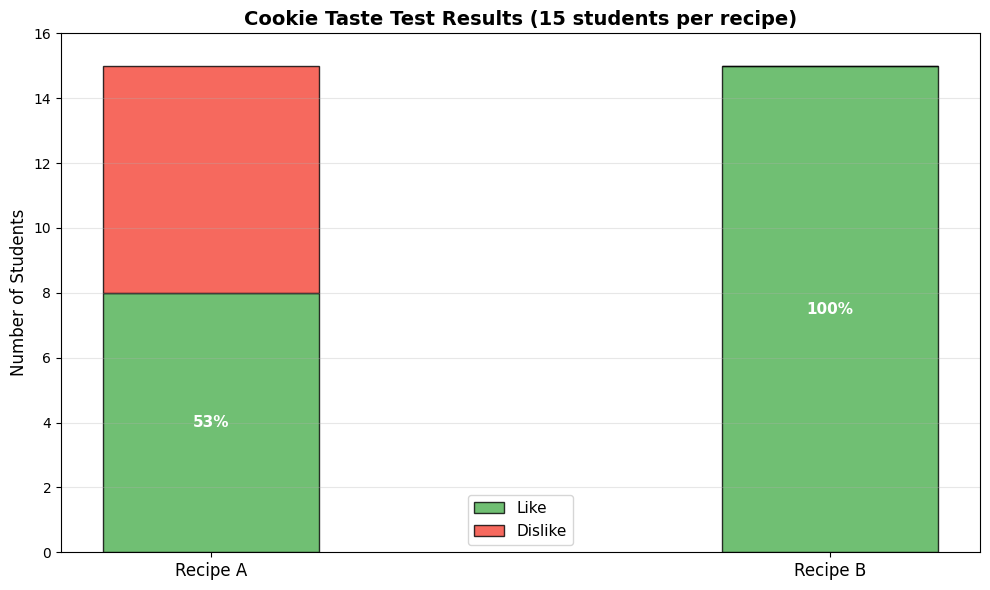


🍪 Cookie Taste Test Results:
   Recipe A: 8/15 students liked it (53%)
   Recipe B: 15/15 students liked it (100%)

✅ Winner: Recipe B!
   → 7 more students preferred Recipe B

💡 Next question: Is this difference real, or could it be luck?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Simulate class taste test (30 students)
np.random.seed(42)

# Recipe A: 60% like it
recipe_a = np.random.choice(['Like', 'Dislike'], size=15, p=[0.60, 0.40])

# Recipe B: 80% like it (better recipe!)
recipe_b = np.random.choice(['Like', 'Dislike'], size=15, p=[0.80, 0.20])

# Count preferences
likes_a = np.sum(recipe_a == 'Like')
likes_b = np.sum(recipe_b == 'Like')

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))

recipes = ['Recipe A', 'Recipe B']
likes = [likes_a, likes_b]
dislikes = [15-likes_a, 15-likes_b]

x = np.arange(len(recipes))
width = 0.35

bars1 = ax.bar(x, likes, width, label='Like', color='#4CAF50', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x, dislikes, width, bottom=likes, label='Dislike', color='#F44336', alpha=0.8, edgecolor='black')

ax.set_ylabel('Number of Students', fontsize=12)
ax.set_title('Cookie Taste Test Results (15 students per recipe)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(recipes, fontsize=12)
ax.legend(fontsize=11)
ax.set_ylim(0, 16)
ax.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for i, (bar, like_count) in enumerate(zip(bars1, likes)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height/2,
            f'{like_count/15*100:.0f}%',
            ha='center', va='center', fontweight='bold', fontsize=11, color='white')

plt.tight_layout()
plt.show()

print(f"\n🍪 Cookie Taste Test Results:")
print(f"   Recipe A: {likes_a}/15 students liked it ({likes_a/15*100:.0f}%)")
print(f"   Recipe B: {likes_b}/15 students liked it ({likes_b/15*100:.0f}%)")
print(f"\n✅ Winner: Recipe B!")
print(f"   → {likes_b - likes_a} more students preferred Recipe B")
print(f"\n💡 Next question: Is this difference real, or could it be luck?")

## Real-World Example: Website Checkout Page Test

An e-commerce site tests two checkout page designs:
- **Version A:** Current design (baseline)
- **Version B:** New simplified design

**Metric:** Conversion rate (% of visitors who complete purchase)

We'll run a complete A/B test with:
1. Sample size calculation
2. Data collection
3. Statistical significance test
4. Business decision

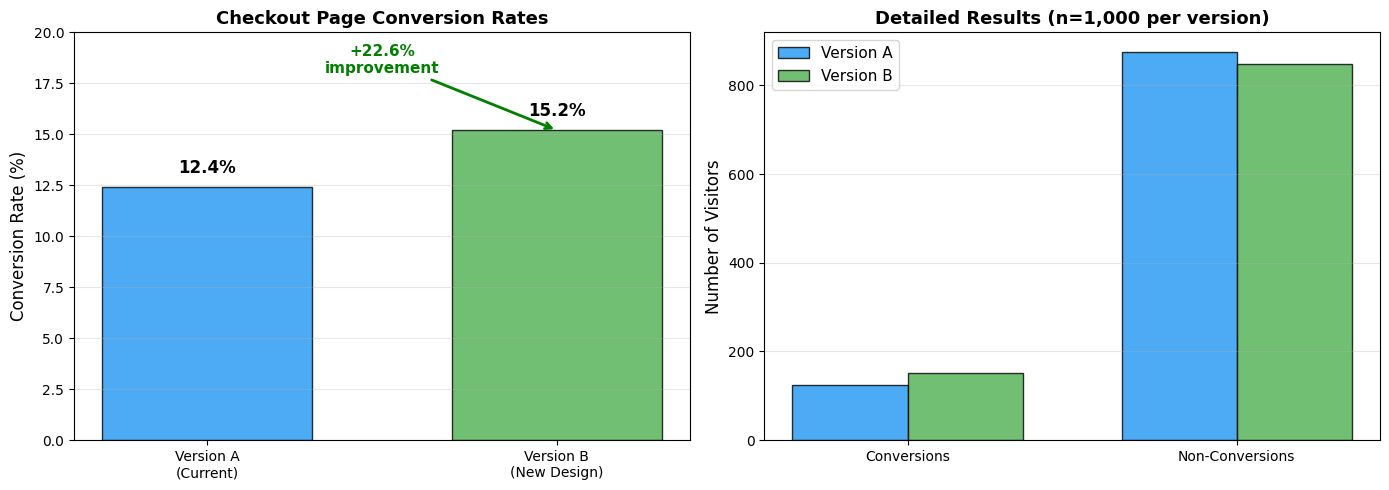


📊 A/B TEST RESULTS

📈 Conversion Rates:
   Version A (Current):  12.40% (124/1000 conversions)
   Version B (New):      15.20% (152/1000 conversions)
   Improvement:          +22.6%

📉 Statistical Test:
   Z-score: 1.815
   P-value: 0.0695

⚠️  RESULT: Not Statistically Significant (p >= 0.05)
   → The difference could be due to random chance
   → Need more data or the effect is too small

💼 BUSINESS DECISION:
   → KEEP Version A or collect more data
   → Not enough evidence to justify the change


In [2]:
# Simulate A/B test for checkout page
np.random.seed(42)

# Test parameters
n_visitors_per_version = 1000  # 1000 visitors see each version

# Version A: Current design - 12% conversion rate
version_a_conversions = np.random.binomial(1, 0.12, n_visitors_per_version)

# Version B: New design - 15% conversion rate (3% improvement)
version_b_conversions = np.random.binomial(1, 0.15, n_visitors_per_version)

# Calculate conversion rates
rate_a = np.mean(version_a_conversions)
rate_b = np.mean(version_b_conversions)
improvement = (rate_b - rate_a) / rate_a * 100

# Statistical test: Is the difference significant?
# Two-proportion z-test
conversions_a = np.sum(version_a_conversions)
conversions_b = np.sum(version_b_conversions)

# Pooled proportion
p_pooled = (conversions_a + conversions_b) / (2 * n_visitors_per_version)

# Standard error
se = np.sqrt(p_pooled * (1 - p_pooled) * (1/n_visitors_per_version + 1/n_visitors_per_version))

# Z-score
z_score = (rate_b - rate_a) / se

# P-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Visualize results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Conversion rates comparison
versions = ['Version A\n(Current)', 'Version B\n(New Design)']
rates = [rate_a * 100, rate_b * 100]
colors = ['#2196F3', '#4CAF50']

bars = ax1.bar(versions, rates, color=colors, alpha=0.8, edgecolor='black', width=0.6)
ax1.set_ylabel('Conversion Rate (%)', fontsize=12)
ax1.set_title('Checkout Page Conversion Rates', fontsize=13, fontweight='bold')
ax1.set_ylim(0, 20)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, rate in zip(bars, rates):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{rate:.1f}%',
            ha='center', va='bottom', fontweight='bold', fontsize=12)

# Add improvement annotation
ax1.annotate(f'+{improvement:.1f}%\nimprovement',
            xy=(1, rate_b * 100), xytext=(0.5, 18),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=11, color='green', fontweight='bold',
            ha='center')

# Statistical significance visualization
categories = ['Conversions', 'Non-Conversions']
version_a_data = [conversions_a, n_visitors_per_version - conversions_a]
version_b_data = [conversions_b, n_visitors_per_version - conversions_b]

x = np.arange(len(categories))
width = 0.35

bars1 = ax2.bar(x - width/2, version_a_data, width, label='Version A', color='#2196F3', alpha=0.8, edgecolor='black')
bars2 = ax2.bar(x + width/2, version_b_data, width, label='Version B', color='#4CAF50', alpha=0.8, edgecolor='black')

ax2.set_ylabel('Number of Visitors', fontsize=12)
ax2.set_title(f'Detailed Results (n={n_visitors_per_version:,} per version)', fontsize=13, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(categories)
ax2.legend(fontsize=11)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Report results
print("\n📊 A/B TEST RESULTS")
print("=" * 50)
print(f"\n📈 Conversion Rates:")
print(f"   Version A (Current):  {rate_a*100:.2f}% ({conversions_a}/{n_visitors_per_version} conversions)")
print(f"   Version B (New):      {rate_b*100:.2f}% ({conversions_b}/{n_visitors_per_version} conversions)")
print(f"   Improvement:          +{improvement:.1f}%")

print(f"\n📉 Statistical Test:")
print(f"   Z-score: {z_score:.3f}")
print(f"   P-value: {p_value:.4f}")

if p_value < 0.05:
    print(f"\n✅ RESULT: Statistically Significant (p < 0.05)")
    print(f"   → The improvement is REAL, not due to random chance")
    print(f"   → Confidence: {(1-p_value)*100:.1f}%")
else:
    print(f"\n⚠️  RESULT: Not Statistically Significant (p >= 0.05)")
    print(f"   → The difference could be due to random chance")
    print(f"   → Need more data or the effect is too small")

print(f"\n💼 BUSINESS DECISION:")
if p_value < 0.05:
    # Calculate revenue impact
    avg_order_value = 50  # dollars
    monthly_visitors = 30000
    
    current_revenue = monthly_visitors * rate_a * avg_order_value
    new_revenue = monthly_visitors * rate_b * avg_order_value
    additional_revenue = new_revenue - current_revenue
    
    print(f"   → IMPLEMENT Version B (New Design)")
    print(f"\n💰 Expected Revenue Impact:")
    print(f"   Current monthly revenue:  ${current_revenue:,.0f}")
    print(f"   New monthly revenue:      ${new_revenue:,.0f}")
    print(f"   Additional revenue:       ${additional_revenue:,.0f}/month")
    print(f"   Annual impact:            ${additional_revenue*12:,.0f}/year")
else:
    print(f"   → KEEP Version A or collect more data")
    print(f"   → Not enough evidence to justify the change")

## Summary: The A/B Testing Framework

### The Five Steps

1. **Define Success Metric**
   - What are we measuring? (conversion rate, clicks, time on page)
   - Make it specific and measurable

2. **Split Randomly**
   - Half see version A, half see version B
   - Random assignment prevents bias

3. **Collect Data**
   - Run experiment long enough for sufficient sample size
   - Typically need hundreds or thousands of observations

4. **Test Significance**
   - Is the difference real or just luck?
   - Use p-value < 0.05 as standard threshold

5. **Make Decision**
   - If significant: implement winner
   - If not: keep current or test something else

### Real-World Applications

- **E-commerce:** Test checkout flows, product descriptions, pricing displays
- **Marketing:** Test email subject lines, ad copy, call-to-action buttons
- **Product:** Test feature designs, user interfaces, onboarding flows
- **Content:** Test headlines, images, article formats

### Key Takeaways

✅ A/B testing = scientific approach to decision making

✅ Always test ONE change at a time (or you won't know what worked)

✅ Need enough data for statistical significance

✅ P-value tells us if results are real or just random noise

✅ Translate statistical results into business impact (revenue, users, engagement)